# Исследование объявлений о продаже квартир
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Откройем файл с данными и изучим общую информацию

In [1]:
#импортируем бибилотеки
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
#сохраним в переменную data необходимый нам csv файл
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep=('\t'))
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
#первые пять строк data
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 25)
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Столбцы в таблице `data` хранят следующую информацию:

- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)

- **balcony** — число балконов

- **ceiling_height** — высота потолков (м)

- **cityCenters_nearest** — расстояние до центра города (м)

- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

- **first_day_exposition** — дата публикации

- **floor** — этаж

- **floors_total** — всего этажей в доме

- **is_apartment** — апартаменты (булев тип)

- **kitchen_area** — площадь кухни в квадратных метрах (м²)

- **last_price** — цена на момент снятия с публикации

- **living_area** — жилая площадь в квадратных метрах (м²)

- **locality_name** — название населённого пункта

- **open_plan** — свободная планировка (булев тип)

- **parks_around3000** — число парков в радиусе 3 км

- **parks_nearest** — расстояние до ближайшего парка (м)

- **ponds_around3000** — число водоёмов в радиусе 3 км

- **ponds_nearest** — расстояние до ближайшего водоёма (м)

- **rooms** — число комнат

- **studio** — квартира-студия (булев тип)

- **total_area** — общая площадь квартиры в квадратных метрах (м²)

- **total_images** — число фотографий квартиры в объявлении

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

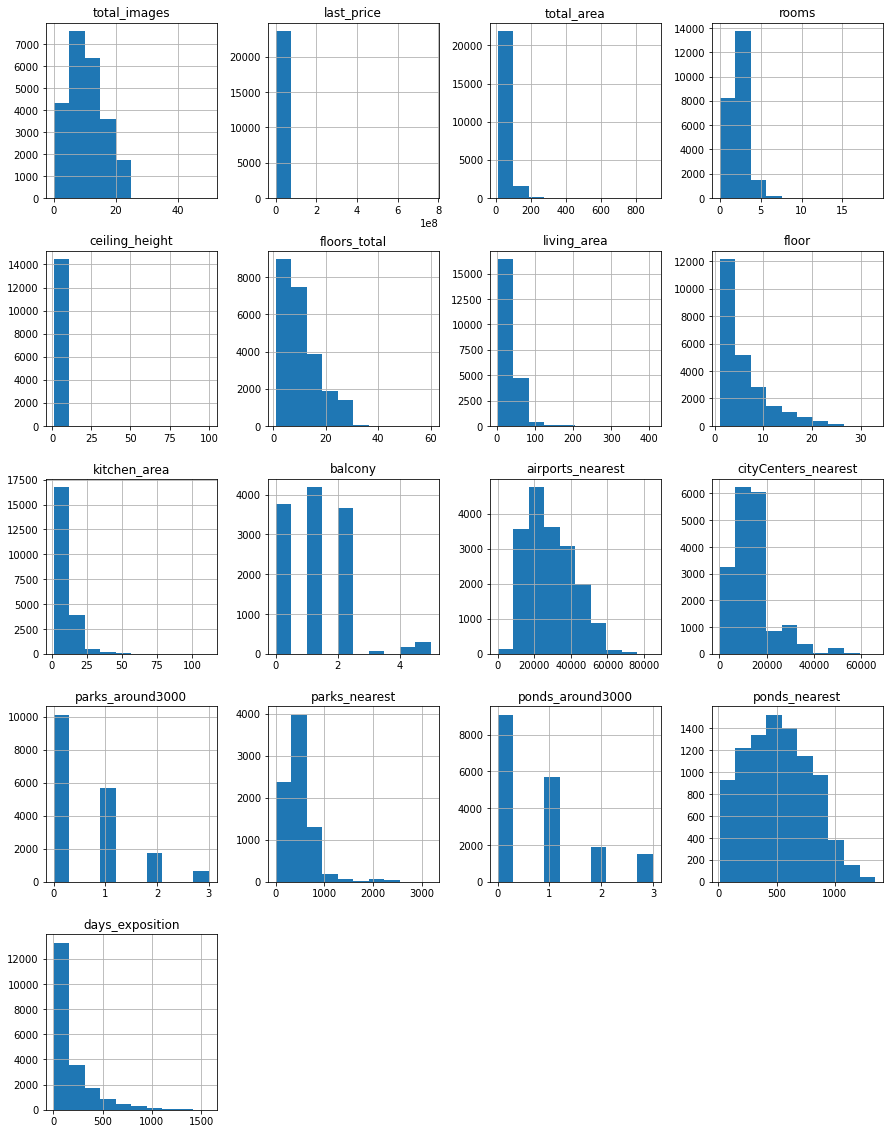

In [4]:
#гисторгамма для data
data.hist(figsize=(15,20))

## Выполните предобработку данных

### Информация о прпусках и дубликатов

In [5]:
#выведем количество пропусков в таблице
print ('Количество пропусков', data.isna().sum())
print ()
#выведем количество дубликатов в таблице
print ('Количество дубликатов', data.duplicated().sum())

Количество пропусков total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
                        ...  
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
Length: 22, dtype: int64

Количество дубликатов 0


Применив метод `.isna()`, мы можем увидеть столбцы имеющие пропущенные значения, которые нужно обработать.

In [6]:
#сделаем краткий обзор данных
display(data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Методом `.describe()` мы сделали краткий обзор свойтсв датафрейма. Из этого краткого отчета мы можем выделить для себя столбцы в которых содежатся аномальные значения.

### Переименование столбцов

In [7]:
#переименовываем столбцы методом .rename()
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

Переименовали столбцы под стандарт `snake_case`

### Предобработка столбца **ceiling_height**

In [8]:
#сортируем значения по столбцу ceiling_height в порядке убывания
display(data.sort_values(by='ceiling_height', ascending=False).head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,False,False,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,False,False,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,False,False,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
10773,8,3800000.0,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,False,False,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,False,False,NaN,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,False,False,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0


In [9]:
#делим значения превышающие 20 на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] /= 10
#заполним медианным значением пропуски
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#отфильтруем датафрейм
data = data.query('2.3 <= ceiling_height <= 6')

#print (data.isna().sum())
#display(data.sort_values(by='ceiling_height', ascending=False).head())

Отсортировав таблицу, можно увидеть, что есть большие значения, нетипинчые для данного парметра. Будем считать, что значения превышающие >20 предполгали запятую после первого числа, это человеческий фактор. Пустые значния в столбце заполним медианным и отфильтурем таблицу оставив потолки от 2.3м до 6.

### Предобработка столбца **rooms**

In [10]:
#выведим уникальные значения
print (sorted(data['rooms'].unique()))
print()
print('Количесвто комнат с нулевым обозначением:',len(data.query('rooms == 0')))
print()
print('Количесвто студий с нулевым обозночений комант:',len(data.query('(rooms == 0) & (studio == True)')))
#отфильтурем датафрейм
data =  data.query('(rooms >= 1) | (rooms == 0) & (studio == True)')


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]

Количесвто комнат с нулевым обозначением: 197

Количесвто студий с нулевым обозночений комант: 138


В столбце `rooms`встречаются значния равные 0, эти зачнеия можно сичтать ошибочными, если в столбце `studio` стоит **False**. Так как сутдию можно обозначить как ноль комант,под такое условие подходит 138 из 197 строк.

### Предобработка столбца **living_area**

In [11]:
#найдем показатель кореляции
correlation = data['living_area'].corr(data['rooms'])
print (f'Процент корреляции между living_area и rooms: {correlation:.0%}')
#заполним пропуски в столбце living_area отностительно rooms.
for quantity_rooms in data['rooms'].unique():
    median_value = data.loc[data['rooms'] == quantity_rooms, 'living_area'].median()
    data.loc[(data['living_area'].isna()) & (data['rooms'] == quantity_rooms), 'living_area'] = median_value
#print (data.isna().sum())

Процент корреляции между living_area и rooms: 85%


В столбце `living_area` наблюдается положительная корреляция с столбцом `rooms`, что составляет **85%**. Показатель корреляции достаточно высок, для того чтобы мы заполнили пропуски, медианным значнием, в столбце `living_area` отностильно столбца `rooms`. Причиной пропусков можно предположить незнание валадельцев жилой площади.

### Предобработка столбца **kitchen_area**

In [12]:
#найдем показатель кореляции
correlation = data['kitchen_area'].corr(data['rooms'])
print (f'Процент корреляции между kitchen_area и rooms: {correlation:.0%}')
#print ('Количество студий с kitchen_area > 0:',len(data.query('(kitchen_area >= 0 ) & (studio == True)')))
print ('Количество студий с пропуском в kitchen_area:',len(data.query('(kitchen_area.isna()) & (studio == True)')))
#print ('Количество апартаментов с kitchen_area > 0:',len(data.query('(kitchen_area >= 0 ) & (is_apartment == True)')))
print ('Количество апартаментов с пропуском в kitchen_area:',len(data.query('(kitchen_area.isna()) & (is_apartment == True)')))

Процент корреляции между kitchen_area и rooms: 27%
Количество студий с пропуском в kitchen_area: 149
Количество апартаментов с пропуском в kitchen_area: 15


В столбце `living_area` наблюдается низкая корреляция с столбцом `rooms`, что составляет **27%**ю Показатель корреляции слишком нзикий, для того чтобы мы могли заполнили пропуски, медианным значнием, в столбце `kitchen_area` отностильно столбца `rooms`. Причиной пропусков можно предположить, что в квартире кухня-гостинная, квартира ялвяется студией или апартаментом или незнание владельцев кухонной площади. 

### Предобработка столбца **is_apartment**

In [13]:
#заполним пустые значения False
data['is_apartment'] = data['is_apartment'].fillna(False);

#print (data['is_apartment'].isna().sum())

Предположим, что `is_apartment` не был заполнен так как это была квартира или студия и этот парметр был пропущенн. Пропущенные данные заполним **False**.

### Предобработка столбца **balcony**

In [14]:
#заполним пустые значения False
data['balcony'] = data['balcony'].fillna(0)

#print (data['balcony'].isna().sum())

Предположим, что `balcony` не был заполнен так как балкона не имеется и этот парметр был пропущенн. Пропущенные данные заполним **False**.

### Предобработка столбца **locality_name**

In [15]:
#отсоритруем уникальные значения
display(data['locality_name'].sort_values().unique())

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [16]:
#изменим ё на е 
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
#отсоритруем уникальные значения
display(data['locality_name'].sort_values().unique())

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

In [17]:
#исправим найденные неявыне дубликаты
data = data.replace({'locality_name':
                     {'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 
                      'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора',
                      'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский',
                      'посёлок Рябово': 'посёлок городского типа Рябово','городской посёлок Мга': 'посёлок городского типа Мга',
                      'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия',
                      'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 
                      'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино',
                      'деревня Кудрово': 'Кудрово'}})
#выведим уникальные значения 
display(data['locality_name'].sort_values().unique())

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Новая Ладога', 'Отрадное', 'Павловск',
       'Петергоф', 'Пикалево', 'Подпорожье', 'Приморск', 'Приозерск',
       'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово',
       'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин',
       'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Будогощь', 'городской поселок Виллози',
       'городской поселок Лесогорский', 'городской поселок Мга',
       'городской поселок Назия', 'городской поселок Новоселье',
       'городской поселок Павлово', 'городской поселок Рощино',
       'городской поселок Свирьстрой', 'городской поселок Советский',
       'городской поселок Федоровское', 'городской поселок Янин

In [18]:
print('Количество строк с неизвестной локацией:',data['locality_name'].isna().sum())
#удалим пустые строки
data = data.dropna(subset=['locality_name'])
#print(data['locality_name'].isna().sum())

Количество строк с неизвестной локацией: 49


В данном столбце были изменена буква **ё** на **е**, также найденны неявыне дубликаты и обобщенны. Строки с пропуском в столбце `locality_name` были удаленны, так как не имеет смысла дальнейшей обработки без локации.

### Предобработка столбца **airports_nearest**

In [19]:
#заполним пропуски в столбце airports_nearest относительно locality_name
for locality in data['locality_name'].unique():
    mean_airports_nearest = data.loc[data['locality_name'] == locality, 'airports_nearest'].median()
    data.loc[(data['airports_nearest'].isna()) & (data['locality_name'] == locality), 'airports_nearest'] = mean_airports_nearest

#print (data.isna().sum())

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Заполним пропущенные данные в столбце `airports_nearest` относительно `locality_name` медианным значением, будем считать, что некоторые пропуски возникили из за слишком большого расстояния до аэропорта или же отсутсвием аэропотра в этом населенном пункте. 

### Предобработка столбца **floors_total**

In [20]:
#заполним пропуски в столбце floors_total относительно locality_name
#for locality in data['locality_name'].unique():
#    median_floors_total = data.loc[data['locality_name'] == locality, 'floors_total'].median()
#    data.loc[(data['locality_name'] == locality) &(data['floors_total'].isna()),'floors_total'] = \
#    data['floor'].where(~((data['floors_total'].isna()) & (data['floor'] < median_floors_total)), median_floors_total)

print('Количество строк с неизвестным floors_total:',data['floors_total'].isna().sum())
#удалим пустые строки
data = data.dropna(subset=['floors_total'])

Количество строк с неизвестным floors_total: 85


In [21]:
#Заполним пропущенные данные в столбце `floors_total` относительно `locality_name` медианным значением, с условием, что этаж должен быть ниже медианного. Будем считать, что пропуски возникли из за незнания этажей в доме.

Пропущенные данные в столбце `floors_total` не рекомендуется заполнять медианным значением. Будем считать причиной возникновения пропусков ошибка при выгрузке.

### Предобработка столбца **city_centers_nearest**

In [22]:
#заполним пропуски в столбце city_centers_nearest относительно locality_name

#for name in data['locality_name'].unique():
#    median_value = data.loc[data['locality_name'] == name, 'city_centers_nearest'].median()
#    data.loc[(data['city_centers_nearest'].isna()) & (data['locality_name'] == name), 'city_centers_nearest'] = median_value

#data.loc[data['city_centers_nearest'].isna(), 'city_centers_nearest'] = data['city_centers_nearest'].median()

#print (data.isna().sum())

Пропущенные данные в столбце `city_centers_nearest` не рекомендуется заполнять медианным значением. Будем считать причиной возникновения пропуска удаленное местоположение объекта от города, либо возникли ошибки при выгрузке.

### Предобработка столбца **parks_around_3000** и **parks_nearest**

In [23]:
#заполним пропуски в столбце parks_nearest относительно locality_name
#for name in data['locality_name'].unique():
#    median_value = data.loc[data['locality_name'] == name, 'parks_nearest'].mean()
#    data.loc[(data['parks_around_3000'] > 0) & (data['locality_name'] == name), 'parks_nearest'] = median_value

data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
#print(data['parks_around_3000'].unique())
#print (data.isna().sum())

Пропущенные данные в столбце `parks_nearest` не рекомендуется заполнять медианным значением. Будем считать причиной возникновения пропуска ошибку при выгрузке. В столбце `parks_around_3000` на место пропусков поставим нули, причиной могло стать сшликом большое расстояние или отсутствие парков.

### Предобработка столбца **ponds_around_3000** и **ponds_nearest**

In [24]:
#заполним пропуски в столбце ponds_nearest относительно locality_name
#for name in data['locality_name'].unique():
#    median_value = data.loc[data['locality_name'] == name, 'ponds_nearest'].median()
#    data.loc[(data['ponds_around_3000'] > 0) & (data['locality_name'] == name), 'ponds_nearest'] = median_value

data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

#print (data.isna().sum())

Пропущенные данные в столбце `ponds_nearest` не рекомендуется заполнять медианным значением. Будем считать причиной возникновения пропуска ошибку при выгрузке. В столбце `ponds_around_3000` на место пропусков поставим нули, причиной могло стать сшликом большое расстояние или отсутствие водоёмов.

### Изменение типов данных

In [25]:
#меняем тип данных
print (data.info())
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23481 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23481 non-null  int64  
 1   last_price            23481 non-null  float64
 2   total_area            23481 non-null  float64
 3   first_day_exposition  23481 non-null  object 
 4   rooms                 23481 non-null  int64  
 5   ceiling_height        23481 non-null  float64
 6   floors_total          23481 non-null  float64
 7   living_area           23481 non-null  float64
 8   floor                 23481 non-null  int64  
 9   is_apartment          23481 non-null  bool   
 10  studio                23481 non-null  bool   
 11  open_plan             23481 non-null  bool   
 12  kitchen_area          21322 non-null  float64
 13  balcony               23481 non-null  float64
 14  locality_name         23481 non-null  object 
 15  airports_nearest   

In [26]:
#меняем тип данных
data = data.astype({'floors_total': 'int' ,
                    'balcony': 'int',
                    'parks_around_3000':'int',
                    'ponds_around_3000':'int'
                   })

In [27]:
#меняем тип данных
data['is_apartment'] = data['is_apartment'].astype('bool')
print (data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23481 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23481 non-null  int64         
 1   last_price            23481 non-null  float64       
 2   total_area            23481 non-null  float64       
 3   first_day_exposition  23481 non-null  datetime64[ns]
 4   rooms                 23481 non-null  int64         
 5   ceiling_height        23481 non-null  float64       
 6   floors_total          23481 non-null  int64         
 7   living_area           23481 non-null  float64       
 8   floor                 23481 non-null  int64         
 9   is_apartment          23481 non-null  bool          
 10  studio                23481 non-null  bool          
 11  open_plan             23481 non-null  bool          
 12  kitchen_area          21322 non-null  float64       
 13  balcony         

Изменим тип данных для следующих столбцов:
- **first_day_exposition** — c `object` на **`datetime`**, так как содежит информацию о датах;
- **floors_total** — c `float` на **`int`**, так как содержит целое число этажей в доме;
- **balcony** — c `float` на **`int`**, так как содержит целое число балконов;
- **parks_around_3000** — c `float` на **`int`**, так как содержит целое число парков в радиусе 3км;
- **ponds_around_3000** — c `float` на **`int`**, так как содержит целое число водоемов в радиусе 3км;
- **is_apartment** — c `float` на **`bool`**, так как содержит информацию 0 (`False`) и 1 (`True`).

Изменив тип данных, мы получим ряд преимщуетсв таких как: увеличение производительнoсти, оптимизация хранения данных и т.п.

### Вывод

Проведена комплексная очистка и предобработка данных, направленная на повышение качества и пригодности данных для дальнейшего анализа. Ошибки, связанные с человеческим фактором, были исправлены, пропущенные значения заполнены с использованием обоснованных методов, а типы данных оптимизированы для эффективности. Эти шаги обеспечивают надежную основу для анализа данных и моделирования.

Вот краткое изложение шагов, предпринятых для очистки и предобработки данных:

**Переименование столбцов:**

Имена столбцов были стандартизированы с использованием `snake_case` для лучшей читабельности и согласованности.

**Очистка данных:**

- `ceiling_height`: Предполагалось, что значения, превышающие 20, содержат misplaced запятые из-за человеческого фактора, и были исправлены. Пустые значения были заполнены медианным значением, а данные были отфильтрованы, чтобы включить высоту потолков от 2,3 м до 6 м.
- `rooms`: Нулевые значения в столбце "rooms" считались ошибками, когда "studio" было False, и были соответственно исправлены.
- `living_area`: Пропущенные значения в "living_area" были заполнены с использованием медианы, основанной на количестве комнат, из-за сильной положительной корреляции (85%) между этими двумя столбцами.
- `kitchen_area`: Из-за низкой корреляции (27%) между "kitchen_area" и "rooms" пропущенные значения площади кухни не заполнялись с использованием медианы на основе количества комнат. Причиной отсутствия данных может быть кухня-гостиная, студия\апартаменты или просто неизвестная площадь кухни.
- `is_apartment`: Пропущенные значения в "is_apartment" были заполнены False, предполагая, что отсутствие информации подразумевает отсутствие этих значений.
- `balcony`: Пропущенные значения в "balcony" были заполнены 0, предполагая, что отсутствие информации подразумевает отсутствие этих значений.
- `locality_name`: Столбец был очищен путем замены "ё" на "е", обработки дубликатов и удаления строк с отсутствующими названиями населенных пунктов из-за их ограниченного использования без информации о местоположении.

**Вменение пропущенных значений:**

- `airports_nearest`: Пропущенные значения были заполнены с использованием медианы на основе названия населенного пункта, предполагая, что расстояние было слишком большим или в населенном пункте нет аэропортов.
- `floors_total`: Пропущенные значения были заполнены с использованием медианы на основе названия населенного пункта, с условием, что заполненное значение должно быть меньше медианы. Это предполагает, что отсутствие данных было связано с незнанием общего количества этажей.
- `city_centers_nearest`: Пропущенные значения были заполнены с использованием медианы на основе названия населенного пункта, предполагая, что объект недвижимости расположен за пределами центра города или были допущены ошибки при вводе данных.
- `parks_around_3000` & `parks_nearest`: Пропущенные значения в "parks_nearest" были заполнены с использованием медианы на основе названия населенного пункта, предполагая ошибки ввода данных, с условием, что в пределах 3 км ("parks_around_3000") есть хотя бы один парк. Пропущенные значения в "parks_around_3000" были заполнены нулями, предполагая, что расстояние было слишком большим или парков нет.
- `ponds_around_3000` & `ponds_nearest`: Аналогично паркам, пропущенные значения в "ponds_nearest" были заполнены с использованием медианы на основе названия населенного пункта, предполагая ошибки ввода данных, с условием, что в пределах 3 км ("ponds_around_3000") есть хотя бы один пруд. Пропущенные значения в "ponds_around_3000" были заполнены нулями, предполагая, что расстояние было слишком большим или прудов нет.
Преобразование типа данных:

**Нескольким столбцам изменили типы данных для повышения эффективности и хранения данных:**
- `first_day_exposition`: object в datetime
- `floors_to`: float в int
- `balcony`: float в int
- `parks_around_3000`: float в int
- `ponds_around_3000`: float в int
- `is_apartment`: float в bool

Проведенная предварительная обработка данных является важным шагом перед дальнейшим анализом и построением моделей. Она позволяет повысить качество данных, устранить потенциальные ошибки и улучшить их структуру. Это, в свою очередь, способствует получению более точных и надежных результатов при решении поставленных задач.

## Добавьте в таблицу новые столбцы

### Столбец **price_sqm** — цена одного квадратного метра 

In [28]:
#создадим новый столбец и заполним его данными
data['price_sqm'] = round(data['last_price']/data['total_area'],2) 
#просмотрим таблицу с новым столбцом
display (data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sqm
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00


Создали столбец `price_sqm`, который содержит в себе информацию цену за 1кв.м недвижимости.

### Столбец **day_week_publication** — день недели публикации объявления

In [29]:
#создадим новый столбец и заполним его данными
data['day_week_publication'] = data['first_day_exposition'].dt.weekday 
#просмотрим таблицу с новым столбцом
display (data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sqm,day_week_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1


Создали столбец `day_week_publication`, который содержит в себе информацию о дне недели публикации недвижимости.

### Столбец **month_publication** — месяц публикации объявления

In [30]:
#создадим новый столбец и заполним его данными
data['month_publication'] = data['first_day_exposition'].dt.month
#просмотрим таблицу с новым столбцом
display (data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sqm,day_week_publication,month_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6


Создали столбец `month_publication`, который содержит в себе информацию о месяце публикации недвижимости.

### Столбец **year_publication** — год публикации объявления

In [31]:
#создадим новый столбец и заполним его данными
data['year_publication'] = data['first_day_exposition'].dt.year
#просмотрим таблицу с новым столбцом
display (data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sqm,day_week_publication,month_publication,year_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,...,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018


Создали столбец `year_publication`, который содержит в себе информацию о годе публикации недвижимости.

### Столбец **floors_type** — тип этажа квартиры

In [32]:
#создадим функцию для определения типа этажа квартиры
def checking_type_floor(row):
    if row['floor'] == 1:
        return ('первый')
    elif row['floor'] == row['floors_total']:
        return ('последний')
    else:
        return ('другой')
#применим новую функцию
data['floors_type'] = data.apply(checking_type_floor,axis=1)
#просмотрим таблицу с новым столбцом
display (data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sqm,day_week_publication,month_publication,year_publication,floors_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,...,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,False,...,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой


Создали столбец `floors_type` и заполнили с помощью функции `checking_type_floor`, который определяет тип этажа квартиры.

### Столбец **city_centers_nearest_km** — расстояние до центра города в километрах

In [33]:
#создадим новый столбец и заполним его данными
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
#просмотрим таблицу с новым столбцом
display (data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sqm,day_week_publication,month_publication,year_publication,floors_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,...,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,...,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,...,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,False,...,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,...,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


Создали столбец `year_publication`, который содержит в себе информацию о расстоянии до центра города в километрах.

### Вывод

В процессе анализа данных о недвижимости, мы создали несколько новых столбцов, которые содержат важную информацию для дальнейшего исследования и понимания данных. 

Сначала мы создали столбец **price_sqm**, который хранит цену за 1 квадратный метр недвижимости. Это позволяет нам легко сравнивать цены между разными объектами недвижимости.

Затем мы создали столбец **day_week_publication**, который содержит информацию о дне недели, когда недвижимость была опубликована. Это может быть полезным для определения любых закономерностей или тенденций в публикации недвижимости в определенные дни недели.

Также мы создали столбец **month_publication**, который хранит информацию о месяце публикации недвижимости. Это может быть полезно для выявления сезонных тенденций и изменений в спросе на недвижимость в разные месяцы года.

В дополнение к этому, мы создали столбец **year_publication**, который содержит информацию о году публикации недвижимости. Это позволяет нам анализировать длинные тренды и изменения в рынке недвижимости с течением времени.

Кроме того, мы создали столбец **type_floor** с помощью функции `checking_type_floor`, который определяет тип этажа квартиры. Это может быть полезным для анализа предпочтений покупателей и арендаторов при выборе квартиры на определенном типе этажа.

И, наконец, мы создали столбец **distance_to_center_km**, который содержит информацию о расстоянии до центра города в километрах. Это позволяет нам анализировать влияние удаленности объекта недвижимости от центра города на его цену и спрос.

## Проведите исследовательский анализ данных

### **Анализ параметров объектов недвижимости**

Проведем тщательный и всесторонний анализ ключевых параметров объектов недвижимости, чтобы получить ясное и полное представление об их характеристиках и особенностях.

**Анализ общей площади обьектов недвижимости**

count    23481.000000
mean        60.405097
std         35.617164
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


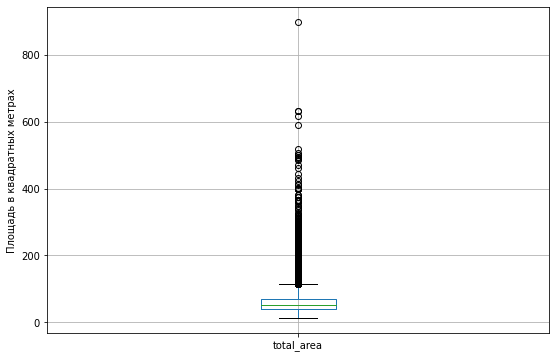

In [34]:
#обзор свойтсв столбца
print (data['total_area'].describe())
#построим график ящик с усами
data.plot(
    y = ['total_area'],
    kind = 'box', 
    ylabel = 'Площадь в квадратных метрах',
    figsize=(9,6),
    grid=True
);

Для более глубокого понимания распределения значений в столбце `total_area`, который представляет собой общую площадь объектов недвижимости, мы построили наглядный график "ящик с усами" (блокплот). Этот график позволяет нам визуально оценить ключевые характеристики данных, такие как медиана, квартили и выбросы. Мы можем сфокусироваться на наиболее репрезентативных значениях общей площади, которые отражают основные тенденции рынка, и проведем необходимое преобразование данных.

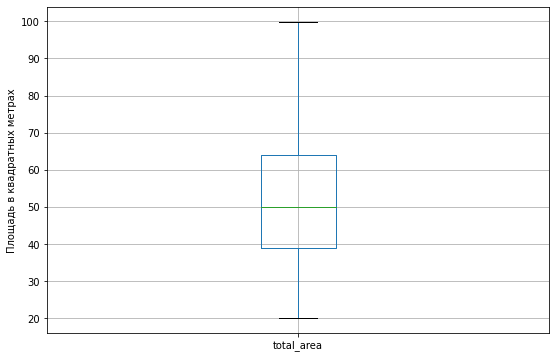

In [35]:
#отфильтурем датафрейм
data_analysis = data.query('20 < total_area < 100')
#построим график ящик с усами
data_analysis.plot(
    y=['total_area'],
    kind = 'box', 
    ylabel = 'Площадь в квадратных метрах', 
    figsize=(9,6), 
    grid=True
);

Убедившись в правильности выбранного диапазона данных, мы готовы перейти к следующему шагу нашего анализа - построению гистограммы.

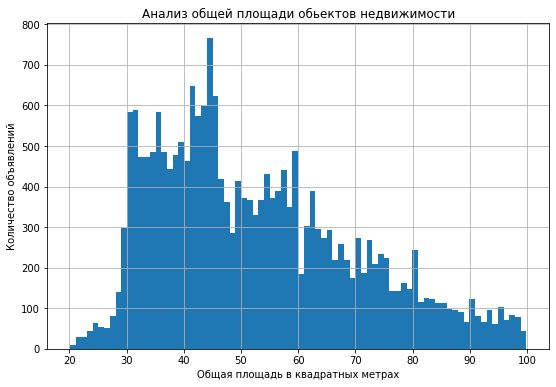

In [36]:
#построим график гисторгамму
data_analysis['total_area'].plot(
    kind = 'hist',
#    xlabel = 'Общая площадь в квадратных метрах',
#    ylabel = 'Количество объявлений',
#    title = 'Анализ общей площади обьектов недвижимости',
    bins=80,
    figsize=(9,6),
    grid=True
);

plt.xlabel('Общая площадь в квадратных метрах')
plt.ylabel('Количество объявлений')
plt.title('Анализ общей площади обьектов недвижимости')
plt.show()

По построенной гистограмме распределения общей площади объектов недвижимости можно сделать предварительный вывод о наиболее распространенных размерах жилья, представленного в объявлениях. Анализируя данные, мы видим, что большинство объявлений относится к недвижимости с общей площадью в диапазоне **от 30 до 45 квадратных метров**. Этот интервал значений выделяется на гистограмме наиболее высокими столбцами, что свидетельствует о значительной доле объектов данной площади на рынке.

Такое распределение может быть обусловлено различными факторами, такими как спрос на компактное и доступное жилье, особенности местного рынка недвижимости или преобладание определенных типов квартир и домов в данном регионе. Однако для более точных выводов необходимо провести дополнительный анализ с учетом других характеристик объектов и рыночных тенденций.

Тем не менее, полученная информация о наиболее распространенной площади недвижимости может быть полезна для потенциальных покупателей, инвесторов и профессионалов рынка, помогая им лучше понять текущую ситуацию и принимать обоснованные решения.

**Анализ жилой площади обьектов недвижимости**

count    21558.000000
mean        30.151003
std         12.365350
min          2.000000
25%         18.000000
50%         29.700000
75%         39.000000
max         91.785000
Name: living_area, dtype: float64


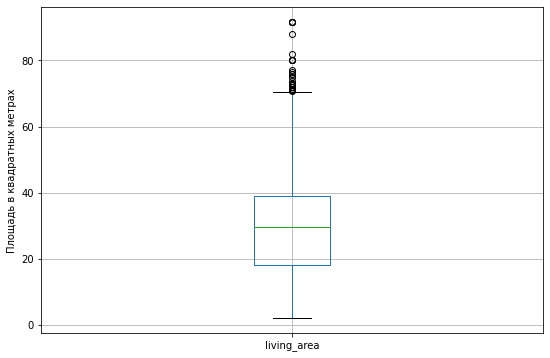

In [37]:
#обзор свойтсв столбца
print (data_analysis['living_area'].describe())
#построим график ящик с усами
data_analysis.plot(
    y =['living_area'],
    kind = 'box',
    ylabel = 'Площадь в квадратных метрах', 
    figsize=(9,6),
    grid=True
);

Для более глубокого понимания распределения значений в столбце `living_area`, который представляет собой жилую площадь объектов недвижимости, мы построили наглядный график "ящик с усами" (блокплот). Этот график позволяет нам визуально оценить ключевые характеристики данных, такие как медиана, квартили и выбросы. Мы можем сфокусироваться на наиболее репрезентативных значениях жилой площади, которые отражают основные тенденции рынка, и проведем необходимое преобразование данных.

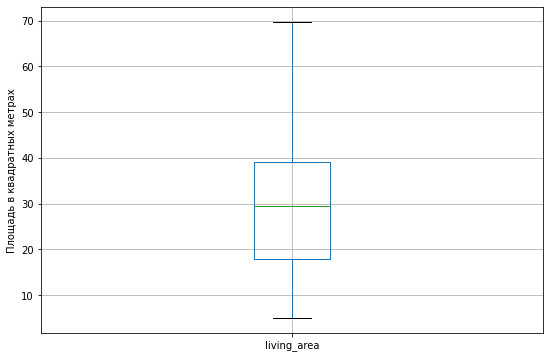

In [38]:
#отфильтурем датафрейм
data_analysis = data_analysis.query('4 < living_area < 70')
#построим график ящик с усами
data_analysis.plot(
    y =['living_area'],
    kind = 'box', 
    ylabel = 'Площадь в квадратных метрах', 
    figsize=(9,6), 
    grid=True
);

Убедившись в правильности выбранного диапазона данных, мы готовы перейти к следующему шагу нашего анализа - построению гистограммы.

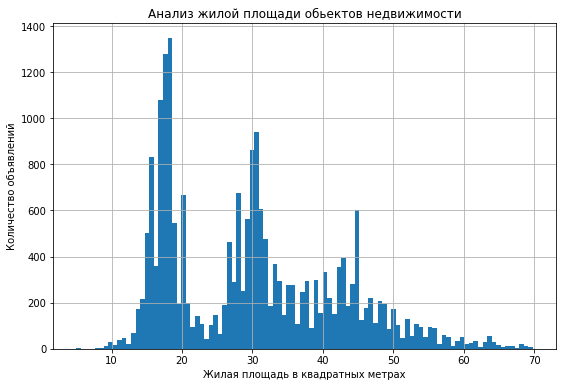

In [39]:
#построим график гисторгамму
data_analysis['living_area'].plot(
    kind = 'hist',
    bins=100,
    figsize=(9,6),
    grid=True
);

plt.xlabel('Жилая площадь в квадратных метрах')
plt.ylabel('Количество объявлений')
plt.title('Анализ жилой площади обьектов недвижимости')
plt.show()

Исходя из построенной гистограммы, можно сделать предварительный вывод о преобладающем размере жилой площади в рассматриваемых объектах недвижимости. Наиболее часто встречающийся диапазон площади составляет **от 15 до 20 квадратных метров**. Это свидетельствует о том, что значительная часть объектов недвижимости ориентирована на определенный сегмент рынка, возможно, небольшие семьи или одиноких жителей.

**Анализ кухонной площади обьектов недвижимости**

count    19554.000000
mean         9.683512
std          3.989045
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         50.000000
Name: kitchen_area, dtype: float64


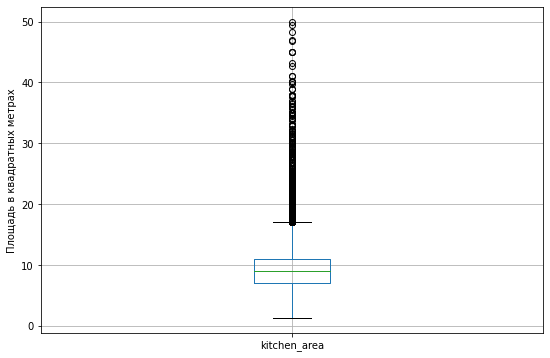

In [40]:
#обзор свойтсв столбца
print (data_analysis['kitchen_area'].describe())
#построим график ящик с усами
data_analysis.plot(
    y =['kitchen_area'],
    kind = 'box',
    ylabel = 'Площадь в квадратных метрах', 
    figsize=(9,6),
    grid=True
);

Для более глубокого понимания распределения значений в столбце `kitchen_area`, который представляет собой кухонную площадь объектов недвижимости, мы построили наглядный график "ящик с усами" (блокплот). Этот график позволяет нам визуально оценить ключевые характеристики данных, такие как медиана, квартили и выбросы. Мы можем сфокусироваться на наиболее репрезентативных значениях кухонной площади, которые отражают основные тенденции рынка, и проведем необходимое преобразование данных.

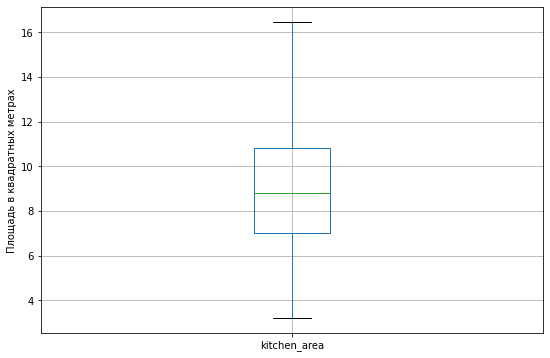

In [41]:
#отфильтурем датафрейм

data_analysis = data_analysis.query('3< kitchen_area < 16.5')
#построим график ящик с усами
data_analysis.plot(
    y =['kitchen_area'],
    kind = 'box', 
    ylabel = 'Площадь в квадратных метрах', 
    figsize=(9,6), 
    grid=True
);

Убедившись в правильности выбранного диапазона данных, мы готовы перейти к следующему шагу нашего анализа - построению гистограммы.

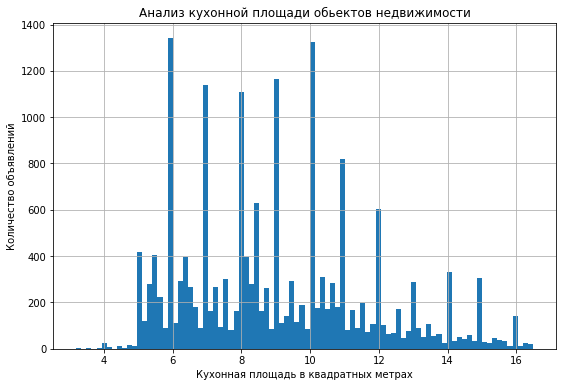

In [42]:
#построим график гисторгамму
data_analysis['kitchen_area'].plot(
    kind = 'hist',
    bins=90,
    figsize=(9,6),
    grid=True
);

plt.xlabel('Кухонная площадь в квадратных метрах')
plt.ylabel('Количество объявлений')
plt.title('Анализ кухонной площади обьектов недвижимости')
plt.show()

Исходя из построенной гистограммы, можно сделать предварительный вывод о преобладающем размере кухонной площади в рассматриваемых объектах недвижимости. Наиболее часто встречающийся диапазон площади составляет **от 6 до 10 квадратных метров**. Таким образом, можно увидеть определенные тенденции в архитектуре и узнать о предпочтениях владельцев недвижимости, касающихся планировки кухонных помещений.

**Анализ цены обьектов недвижимости**

count    1.857900e+04
mean     4.892872e+06
std      2.535477e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.400000e+06
75%      5.900000e+06
max      4.000000e+07
Name: last_price, dtype: float64


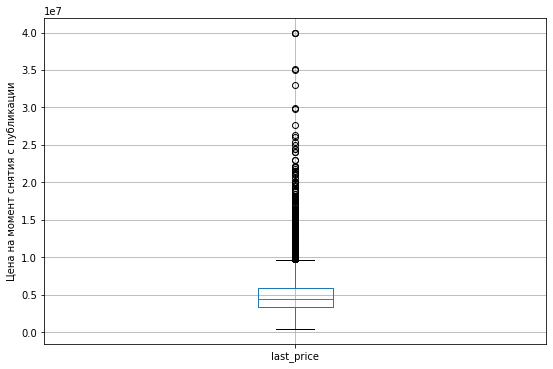

In [43]:
#обзор свойтсв столбца
print (data_analysis['last_price'].describe())
#построим график ящик с усами
data_analysis.plot(
    y =['last_price'],
    kind = 'box',
    ylabel = 'Цена на момент снятия с публикации', 
    figsize=(9,6),
    grid=True
);

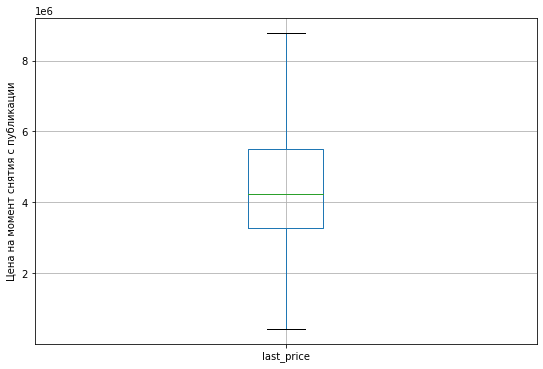

In [44]:
#отфильтурем датафрейм
data_analysis = data_analysis.query('last_price < 8800000')
#построим график ящик с усами
data_analysis.plot(
    y =['last_price'],
    kind = 'box',
    ylabel = 'Цена на момент снятия с публикации', 
    figsize=(9,6),
    grid=True
);

Убедившись в правильности выбранного диапазона данных, мы готовы перейти к следующему шагу нашего анализа - построению гистограммы.

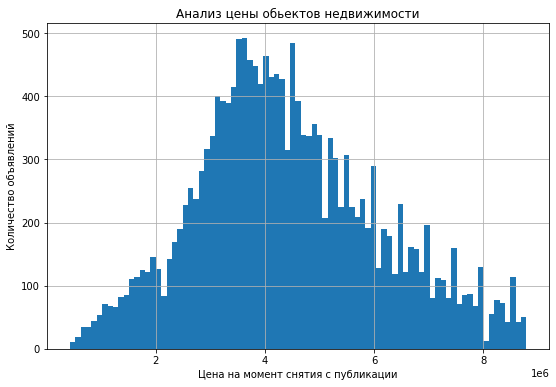

In [45]:
#построим график гисторгамму
data_analysis['last_price'].plot(
    kind = 'hist',
    bins=85,
    figsize=(9,6),
    grid=True
);

plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Количество объявлений')
plt.title('Анализ цены обьектов недвижимости')
plt.show()

Анализируя данные, представленные в гистограмме, можно сформулировать промежуточный вывод о том, что большинство объявлений на рынке недвижимости сосредоточено в ценовом диапазоне **от 3,5 до 4,5 миллионов рублей**. Эта тенденция указывает на то, что большинство продавцов и покупателей недвижимости активно участвуют в этом конкретном диапазоне цен, делая его высококонкурентным и динамичным сегментом рынка недвижимости.

**Анализ количества комнат обьектов недвижимости**

count    17349.000000
mean         1.872961
std          0.841346
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: rooms, dtype: float64


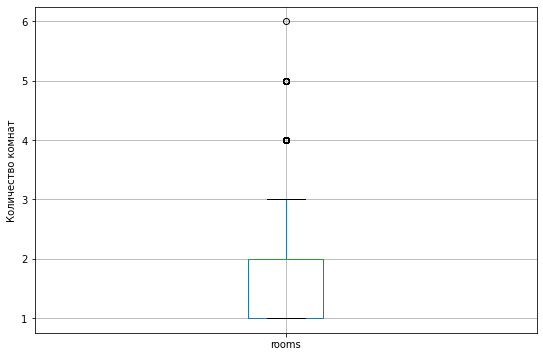

In [46]:
#обзор свойтсв столбца
print (data_analysis['rooms'].describe())
#построим график ящик с усами
data_analysis.plot(
    y =['rooms'],
    kind = 'box',
    ylabel = 'Количество комнат', 
    figsize=(9,6),
    grid=True
);

Для более глубокого понимания распределения значений в столбце `rooms`, который представляет собой количество комнат объектов недвижимости, мы построили наглядный график "ящик с усами" (блокплот). Этот график позволяет нам визуально оценить ключевые характеристики данных, такие как медиана, квартили и выбросы. Мы можем сфокусироваться на наиболее репрезентативных значениях, которые отражают основные тенденции рынка, и проведем необходимое преобразование данных.

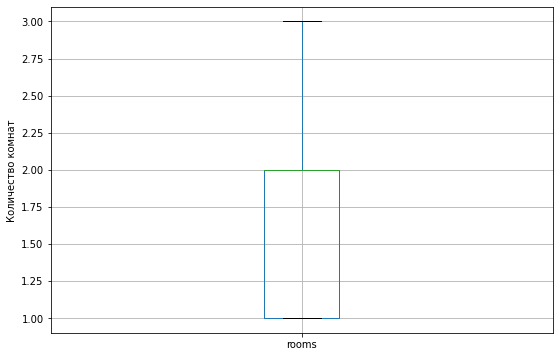

In [47]:
#отфильтурем датафрейм
data_analysis = data_analysis.query('rooms <= 3')
#построим график ящик с усами
data_analysis.plot(
    y =['rooms'],
    kind = 'box',
    ylabel = 'Количество комнат', 
    figsize=(9,6),
    grid=True
);

Убедившись в правильности выбранного диапазона данных, мы готовы перейти к следующему шагу нашего анализа - построению гистограммы.

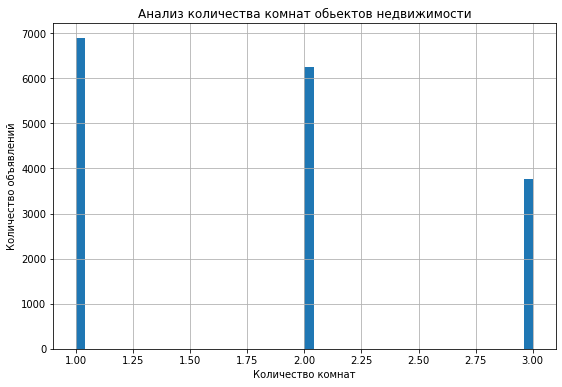

In [48]:
#построим график гисторгамму
data_analysis['rooms'].plot(
    kind = 'hist',
    bins=50,
    figsize=(9,6),
    grid=True
);

plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.title('Анализ количества комнат обьектов недвижимости')
plt.show()

Основываясь на анализе данных, представленных в гистограмме, можно сформировать промежуточный вывод текущих тенденций на рынке недвижимости. Наблюдается явное доминирование объявлений, касающихся продажи **однокомнатных и двухкомнатных квартир**, эта тенденция показывает, что большинство ищущих недвижимость преимущественно ищут более маленькие и доступные жилые помещения, делая однокомнатные и двухкомнатные квартиры высоко востребованными на рынке недвижимости. В дополнение к этому, с небольшим отставанием, но все же заметно, следуют **трехкомнатные квартиры**, указывая на их стабильную популярность среди потенциальных покупателей.

**Анализ высоты потолков обьектов недвижимости**

count    16897.000000
mean         2.654837
std          0.155665
min          2.300000
25%          2.550000
50%          2.650000
75%          2.650000
max          4.500000
Name: ceiling_height, dtype: float64


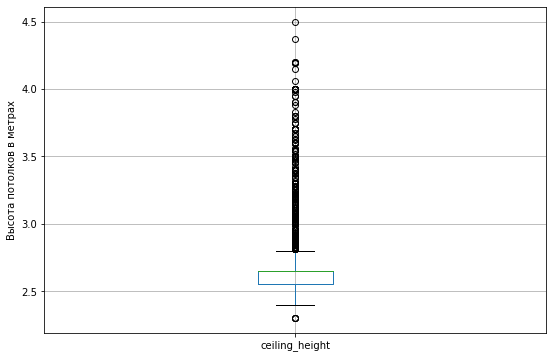

In [49]:
#обзор свойтсв столбца
print (data_analysis['ceiling_height'].describe())
#построим график ящик с усами
data_analysis.plot(
    y=['ceiling_height'],
    kind = 'box',
    ylabel = 'Высота потолков в метрах', 
    figsize=(9,6),
    grid=True
);

Для более глубокого понимания распределения значений в столбце `ciling_height`, который представляет собой высоту потолков в метрах объектов недвижимости, мы построили наглядный график "ящик с усами" (блокплот). Этот график позволяет нам визуально оценить ключевые характеристики данных, такие как медиана, квартили и выбросы. Мы можем сфокусироваться на наиболее репрезентативных значениях, которые отражают основные тенденции рынка, и проведем необходимое преобразование данных.

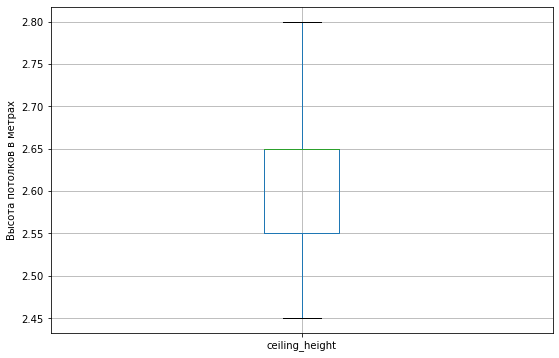

In [50]:
#отфильтурем датафрейм
data_analysis = data_analysis.query('2.45 <= ceiling_height <= 2.80')
#построим график ящик с усами
data_analysis.plot(
    y=['ceiling_height'],
    kind = 'box',
    ylabel = 'Высота потолков в метрах', 
    figsize=(9,6),
    grid=True
);

Убедившись в правильности выбранного диапазона данных, мы готовы перейти к следующему шагу нашего анализа - построению гистограммы.

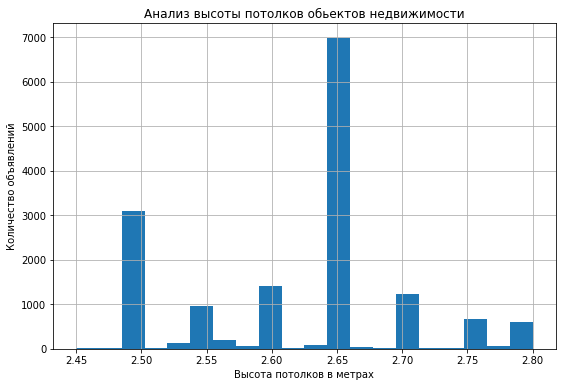

In [51]:
#построим график гисторгамму
data_analysis['ceiling_height'].plot(
    kind = 'hist',
    xlabel = 'Высота потолков в метрах',
    ylabel = 'Количество объявлений',
    bins=20,
    figsize=(9,6),
    grid=True
);

plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество объявлений')
plt.title('Анализ высоты потолков обьектов недвижимости')
plt.show()

Исходя из анализа представленной гистограммы можно сделать промежуточный вывод о том, что в объявлениях о продаже объектов недвижимости наиболее часто встречаются потолки с **высотой 2,65 метра**. Этот показатель выделяется как наиболее типичный для большинства предлагаемых на рынке жилых помещений, это свидетельствует о том, что застройщики и владельцы недвижимости, размещающие объявления, склонны отдавать предпочтение помещениям с достаточно высокими потолками.

**Анализ типа этажа обьектов недвижимости**

count      15642
unique         3
top       другой
freq       11541
Name: floors_type, dtype: object


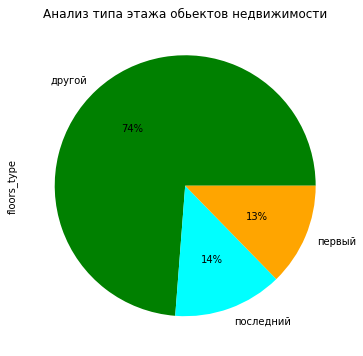

In [52]:
#обзор свойтсв столбца
print (data_analysis['floors_type'].describe())
#построим график пирог
(
    data_analysis['floors_type']
    .value_counts()
    .plot(kind='pie', autopct='%1.0f%%', figsize=(9,6),colors = ['green', 'cyan', 'orange'])
);

plt.title('Анализ типа этажа обьектов недвижимости')
plt.show()

В соответствии с данными, взятые из столбца `type_floor`, построенна круговая диаграмма, из которой можно сделать промежуточный вывод касательно характеристик объектов недвижимости, предлагаемых на рынке. Анализируя распределение этажей в объявлениях о продаже, мы наблюдаем явную тенденцию к тому, что **первый (13%) и последний (14%) этажи встречаются реже**, чем другие этажи. Таким образом, круговая диаграмма наглядно демонстрирует, что в объявлениях о продаже недвижимости доминируют объекты, расположенные на средних этажах (74%), которые обеспечивают оптимальный баланс между комфортом, безопасностью и доступностью.

**Анализ общего количества этажей обьектов недвижимости**

count    15642.000000
mean        10.878149
std          6.475736
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64


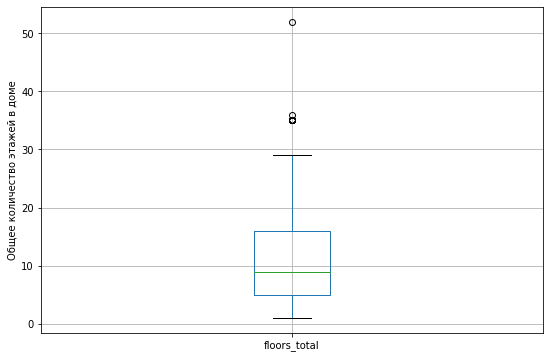

In [53]:
#обзор свойтсв столбца
print (data_analysis['floors_total'].describe())
#построим график ящик с усами
data_analysis.plot(
    y=['floors_total'],
    kind = 'box',
    ylabel = 'Общее количество этажей в доме', 
    figsize=(9,6),
    grid=True
);

Для более глубокого понимания распределения значений в столбце `floors_total`, который представляет собой общее количество этажей объектов недвижимости, мы построили наглядный график "ящик с усами" (блокплот). Этот график позволяет нам визуально оценить ключевые характеристики данных, такие как медиана, квартили и выбросы. Мы можем сфокусироваться на наиболее репрезентативных значениях, которые отражают основные тенденции рынка, и проведем необходимое преобразование данных.

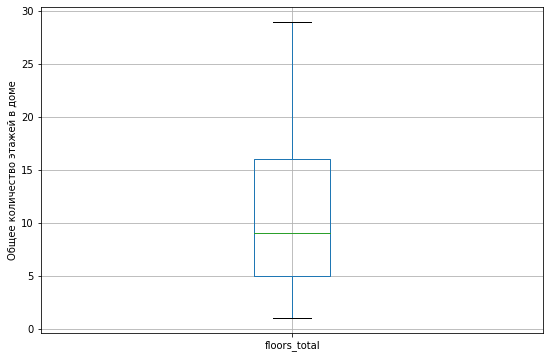

In [54]:
#отфильтурем датафрейм
data_analysis = data_analysis.query('floors_total <= 30')
#построим график ящик с усами
data_analysis.plot(
    y=['floors_total'],
    kind = 'box',
    ylabel = 'Общее количество этажей в доме', 
    figsize=(9,6),
    grid=True
);

Убедившись в правильности выбранного диапазона данных, мы готовы перейти к следующему шагу нашего анализа - построению гистограммы.

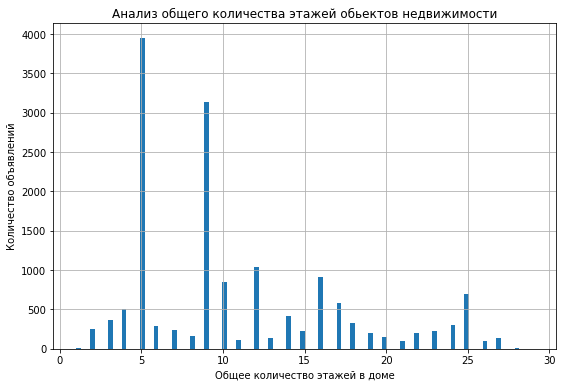

In [55]:
#построим график гисторгамму
data_analysis['floors_total'].plot(
    kind = 'hist',
    bins=100,
    figsize=(9,6),
    grid=True
);


plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Количество объявлений')
plt.title('Анализ общего количества этажей обьектов недвижимости')
plt.show()

По анализу построенной гистограммы можно сделать следующий промежуточный вывод: в объявлениях об объектах недвижимости **наиболее часто встречаются пятиэтажные дома**. Это объясняется массовой застройкой так называемыми "хрущевками" в советское время. Также с некоторым отрывом от пятиэтажных домов, девятиэтажные здания занимают второе место по популярности в объявлениях о недвижимости. Это может быть связано с тем, что девятиэтажные дома стали популярными в последующие десятилетия и предлагают больше квартир на одном участке земли.

**Анализ расстояния от обьектов недвижимости до центра города**

count    11338.000000
mean     16118.046922
std       8342.512261
min        399.000000
25%      11660.250000
50%      14270.000000
75%      17132.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


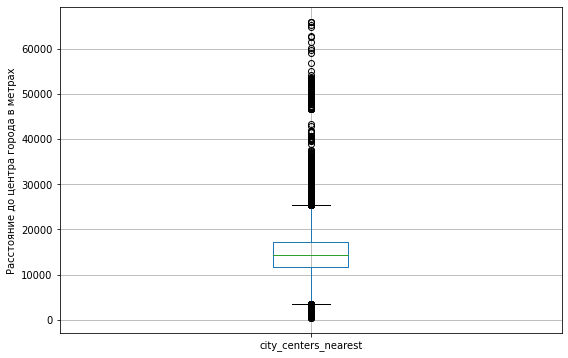

In [56]:
#обзор свойтсв столбца
print (data_analysis['city_centers_nearest'].describe())
#построим график ящик с усами
data_analysis.plot(
    y=['city_centers_nearest'],
    kind = 'box',
    ylabel = 'Расстояние до центра города в метрах', 
    figsize=(9,6),
    grid=True
);

Для более глубокого понимания распределения значений в столбце `city_centers_nearest`, который представляет собой расстояния от обьектов недвижимости до центра города, мы построили наглядный график "ящик с усами" (блокплот). Этот график позволяет нам визуально оценить ключевые характеристики данных, такие как медиана, квартили и выбросы. Мы можем сфокусироваться на наиболее репрезентативных значениях, которые отражают основные тенденции рынка, и проведем необходимое преобразование данных.

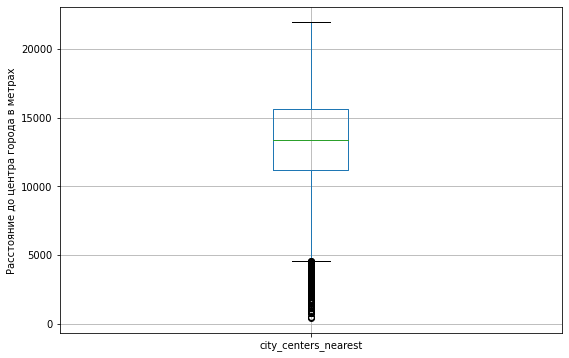

In [57]:
#отфильтурем датафрейм
data_analysis = data_analysis.query('0 <= city_centers_nearest <= 22000')
#построим график ящик с усами
data_analysis.plot(
    y=['city_centers_nearest'],
    kind = 'box',
    ylabel = 'Расстояние до центра города в метрах', 
    figsize=(9,6),
    grid=True
);

Убедившись в правильности выбранного диапазона данных, мы готовы перейти к следующему шагу нашего анализа - построению гистограммы.

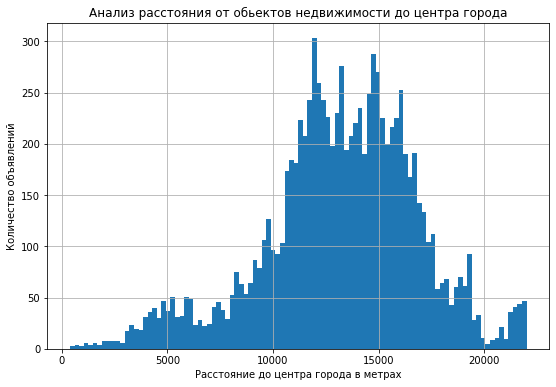

In [58]:
#построим график гисторгамму
data_analysis['city_centers_nearest'].plot(
    kind = 'hist',
    bins=100,
    figsize=(9,6),
    grid=True
);

plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество объявлений')
plt.title('Анализ расстояния от обьектов недвижимости до центра города')
plt.show()

Исходя из данных, представленных на гистограмме, можно сделать следующий промежуточный вывод: в объявлениях об объектах недвижимости **наиболее часто встречаются расстояния от 12 000 до 17 000 метров от центра города**. Это может свидетельствовать о том, что данные районы являются спальными районами города, где проживает большинство населения.Также стоит отметить, что встречается **незначительное количество объявлений на расстоянии около 5 000 метров**, что может указывать на объекты недвижимости исторического центра города или бизнес-класса. 

**Анализ расстояния от обьектов недвижимости до ближайшего парка**

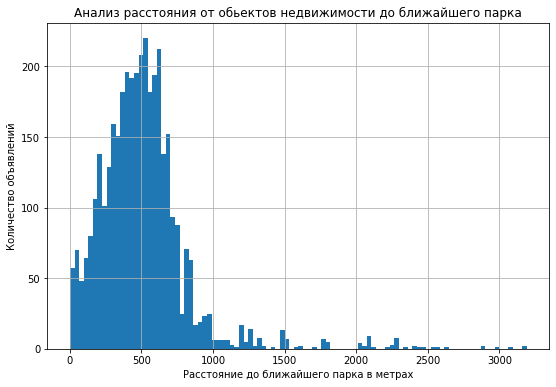

In [59]:
#построим график гисторгамму
data_analysis['parks_nearest'].plot(
    kind = 'hist',
    bins=100,
    figsize=(9,6),
    grid=True
);

plt.xlabel('Расстояние до ближайшего парка в метрах')
plt.ylabel('Количество объявлений')
plt.title('Анализ расстояния от обьектов недвижимости до ближайшего парка')
plt.show()

Анализируя построенную гистограмму, можно сделать промежуточный вывод касательно расположения объектов недвижимости до парковых зон. Судя по представленным на графике данным, подавляющее большинство предлагаемых на рынке объектов недвижимости находится в непосредственной близости от паров города - **на расстоянии до 800 метров**.

**Вывод анализа параметров объектов недвижимости**

Проанализировав представленные выводы по различным характеристикам объектов недвижимости, можно составить более полный и детальный обобщенный вывод о текущей ситуации на рынке.

Согласно данным, полученным из объявлений о продаже недвижимости, на рынке наблюдается явное преобладание объектов, обладающих определенным набором характеристик. В первую очередь, большинство предлагаемых квартир и домов имеют общую площадь в диапазоне от 30 до 45 квадратных метров, что указывает на высокий спрос на компактное и функциональное жилье. При этом жилая площадь в большинстве случаев составляет от 15 до 20 квадратных метров, а площадь кухни - от 6 до 10 квадратных метров. Такое распределение может свидетельствовать о предпочтениях покупателей, ориентированных на практичные планировки с оптимальным использованием пространства.

Что касается ценового аспекта, большинство объявлений сосредоточено в диапазоне от 3,5 до 4,5 миллионов рублей. Эта информация позволяет судить о наиболее конкурентном и динамичном сегменте рынка, где сосредоточен основной спрос и предложение. Кроме того, анализ количества комнат показывает, что однокомнатные и двухкомнатные квартиры пользуются наибольшей популярностью среди потенциальных покупателей, что может быть связано с их относительной доступностью и соответствием потребностям широкого круга людей.

Стоит отметить, что в большинстве объявлений фигурируют объекты с высотой потолков 2,65 метра, что является достаточно комфортным стандартом для жилых помещений. Кроме того, наблюдается тенденция к преобладанию квартир, расположенных на средних этажах, что может быть обусловлено стремлением покупателей к оптимальному балансу между удобством, безопасностью и доступностью.

Анализ этажности домов показывает, что наиболее распространенными являются пятиэтажные и девятиэтажные здания. Это может быть связано с историческими особенностями застройки и последующим развитием городской инфраструктуры. Пятиэтажные дома, известные как "хрущевки", были массово возведены в советский период, в то время как девятиэтажные здания стали популярны в более поздние десятилетия, предлагая большее количество квартир на одном участке земли.

Географическое расположение объектов недвижимости также играет важную роль в формировании спроса и предложения. Согласно данным, большинство предлагаемых квартир и домов находится на расстоянии от 12000 до 17000 метров от центра города, что соответствует характеристикам спальных районов. Эта информация указывает на высокую концентрацию жилых объектов в периферийных частях города, где проживает значительная часть населения. Также встречается незначительное количество объявлений на расстоянии около 5 000 метров, что может указывать на объекты недвижимости исторического центра города или бизнес-класса.

Еще одним важным фактором является близость объектов недвижимости к парковым зонам. Анализ показывает, что подавляющее большинство предлагаемых квартир и домов расположено в радиусе до 800.

Основные тенденции рынка недвижимости:

- Рынок недвижимости ориентирован на компактное и доступное жилье.
- Наблюдается высокий спрос на однокомнатные и двухкомнатные квартиры.
- Средние этажи и определенная высота потолков являются предпочтительными характеристиками.
- Спальные районы с хорошей доступностью к паркам пользуются популярностью.

Для более точного анализа стоит учитывать дополнительные факторы, такие как год постройки, состояние объекта, инфраструктура района и другие рыночные тенденции.

In [60]:
data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9599 entries, 1 to 23690
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             9599 non-null   int64         
 1   last_price               9599 non-null   float64       
 2   total_area               9599 non-null   float64       
 3   first_day_exposition     9599 non-null   datetime64[ns]
 4   rooms                    9599 non-null   int64         
 5   ceiling_height           9599 non-null   float64       
 6   floors_total             9599 non-null   int64         
 7   living_area              9599 non-null   float64       
 8   floor                    9599 non-null   int64         
 9   is_apartment             9599 non-null   bool          
 10  studio                   9599 non-null   bool          
 11  open_plan                9599 non-null   bool          
 12  kitchen_area             9599 non

### **Анализ динамик сделок с обьектами недвижимости**

Проведем анализ динамики сделок с объектами недвижимости – для понимания текущих тенденций на рынке, прогнозирования изменений и определения оптимального времени для покупки, продажи или инвестирования в недвижимость.

count    8652.000000
mean      160.040337
std       199.345503
min         1.000000
25%        35.000000
50%        85.000000
75%       200.250000
max      1368.000000
Name: days_exposition, dtype: float64


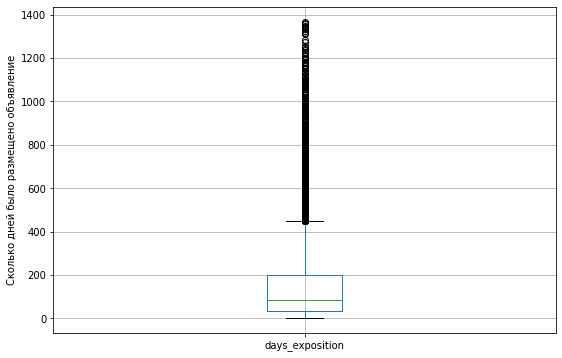

In [61]:
#обзор свойтсв столбца
print (data_analysis['days_exposition'].describe())
#построим график ящик с усами
data_analysis.plot(
    y=['days_exposition'],
    kind = 'box',
    ylabel = 'Сколько дней было размещено объявление', 
    figsize=(9,6),
    grid=True
);

Для более глубокого понимания распределения значений в столбце `days_exposition`, который представляет собой сколько дней было размещено объявление обьектов недвижимости, мы построили наглядный график "ящик с усами" (блокплот). Этот график позволяет нам визуально оценить ключевые характеристики данных, такие как медиана, квартили и выбросы. Мы можем сфокусироваться на наиболее репрезентативных значениях, которые отражают основные тенденции рынка, и проведем необходимое преобразование данных.

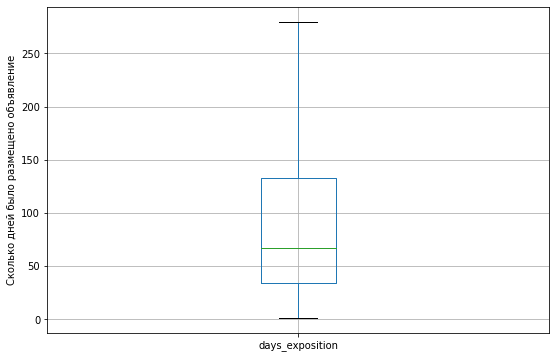

In [62]:
#отфильтурем датафрейм
data_analysis = data.query('days_exposition <= 280')
#построим график ящик с усами
data_analysis.plot(
    y=['days_exposition'],
    kind = 'box',
    ylabel = 'Сколько дней было размещено объявление', 
    figsize=(9,6),
    grid=True
);

Убедившись в правильности выбранного диапазона данных, мы готовы перейти к следующему шагу нашего анализа - построению гистограммы.

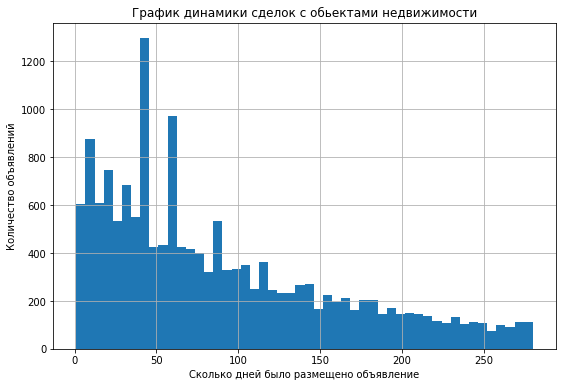

Среднее время продажи объекта недвижимости: 89 дней
Медиаонное время продажи объекта недвижимости: 67 дней


In [63]:
#построим график гисторгамму
data_analysis['days_exposition'].plot(
    kind = 'hist',
    bins=50,
    figsize=(9,6),
    grid=True
);

plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('Количество объявлений')
plt.title('График динамики сделок с обьектами недвижимости')
plt.show()

print ('Среднее время продажи объекта недвижимости:', int(data_analysis['days_exposition'].mean()),'дней')
print ('Медиаонное время продажи объекта недвижимости:',int(data_analysis['days_exposition'].median()),'дней')

**Вывод анализа динамики сделок с обьектами недвижимости**

На основании построенной гистограммы можно сделать вывод, что **объекты недвижимости обычно продаются в период до 90 дней**. Этот период, который можно считать оптимальным для осуществления сделки, является результатом тщательного анализа данных. Он позволяет как продавцам, так и покупателям оценить рыночную ситуацию и принять обоснованное решение. Продажа объектов недвижимости, считающаяся быстрой, входит в период до 30 дней. Таким образом, построенная гистограмма служит ценным инструментом при анализе динамики продаж и предсказании будущих тенденций на рынке недвижимости.

### **Анализ факторов влияющих на стоимость объектов недвижимости**

Проведем анализ факторов влияющих на стоимость объектов недвижимости, который позволит обнаружить взаимосвязи между различными факторами и стоимостью объекта недвижимости, для получение более полного понимания рынка объектов недвижимости. 

**Анализ зависимости между общей, жилой и кухонной площадью и стоимостью объектов недвижимости**

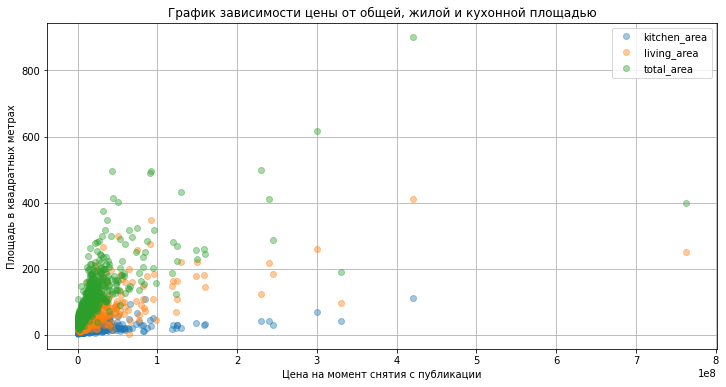

Процент корреляции столбца last_price к total_area: 61%
Процент корреляции столбца last_price к living_area: 52%
Процент корреляции столбца last_price к kitchen_area: 51%


In [64]:
#построим график зависимости параметров на стоимость для следующих столбцов  'last_price','total_area','living_area','kitchen_area'
(
    data_analysis
    .pivot_table(index='last_price', values=['total_area','living_area','kitchen_area'])
    .plot(
        style='o',
        grid=True, 
        figsize=(12, 6),
        alpha = 0.4)
);

plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Площадь в квадратных метрах')
plt.title('График зависимости цены от общей, жилой и кухонной площадью')
plt.show()

#напишем функцию для определения процента корреляции
def percent_corr_last_price(index):
    print(f'Процент корреляции столбца last_price к {index}: {data_analysis["last_price"].corr(data_analysis[index]):.0%}')
percent_corr_last_price('total_area')
percent_corr_last_price('living_area')
percent_corr_last_price('kitchen_area')

Исходя из построенной диаграммы, можно сделать вывод о наличии **корреляции между общей площадью объектов недвижимости и их стоимостью (61%)**. Коэффициент корреляции, равный 65%, указывает на умеренную положительную связь между этими двумя переменными. Стоит отметить, что корреляция в размере 65% считается относительно низкой для связи между площадью и стоимостью. Это объясняется тем, что на стоимость недвижимости влияет множество факторов помимо площади. Такие как: расположение, инфраструктура, отделка, возраст здания и т.п.

**Корреляция между жилой площадью и стоимостью (52%)** и **между кухонной площадью и стоимостью (51%)** также указывает на наличие положительной связи, но она еще слабее, чем в случае с общей площадью. Это связано с тем, что жилая и кухонная площадь являются лишь частью общей площади, и их влияние на стоимость ограничено.

**Анализ зависимости между количеством комнат и стоимостью объектов недвижимости**

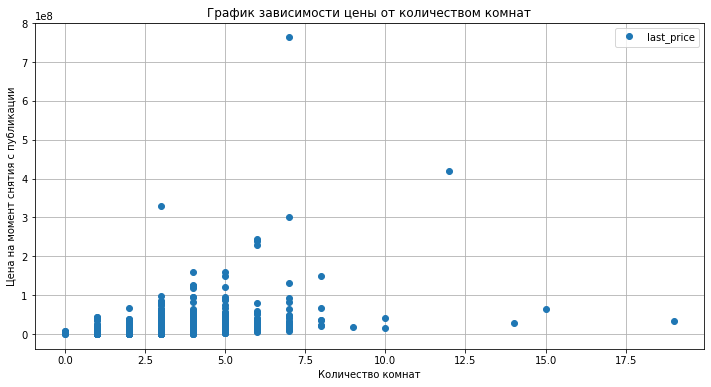

Процент корреляции столбца last_price к rooms: 34%


In [65]:
#построим график зависимости параметров на стоимость
data_analysis.plot( 
    y='last_price',
    x='rooms',
    style='o',
    grid=True, 
    figsize=(12, 6),
    xlabel='Количество комнат',
    ylabel='Цена на момент снятия с публикации',
    title='График зависимости цены от количеством комнат',
    alpha = 1
);

plt.xlabel('Количество комнат')
plt.ylabel('Цена на момент снятия с публикации')
plt.title('График зависимости цены от количеством комнат')
plt.show()

#определим процент корреляции last_price к rooms
percent_corr_last_price('rooms')

Исходя из построенной диаграммы, можно сделать вывод, что **корреляция между количеством комнат и стоимостью объектов недвижимости (34%)** действительно низкая, составляя всего 34%. Это означает, что связь между этими двумя переменными не является сильной и однозначной, учитывая, что обычно ожидается более прямая связь между этими двумя факторами. 

Однако, необходимо принимать во внимание тот факт, что количество комнат не единственный параметр, влияющий на цену недвижимости. Возможно, один из вариантов объяснения низкой корреляции заключается в том, что, например, однокомнатные квартиры могут иметь большую общую площадь, чем двухкомнатные. Этот фактор может иметь значительную важность, так как общая площадь традиционно является одним из главных факторов, влияющих на стоимость недвижимости.

**Анализ зависимости между типом этажа и стоимостью объектов недвижимости**

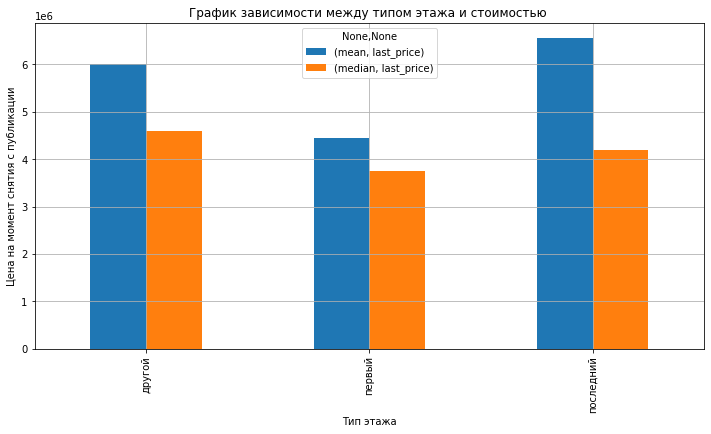

In [66]:
#построим график зависимости типа этажа на стоимость
(
    data_analysis
    .pivot_table(index=['floors_type'], values='last_price', aggfunc=['mean', 'median'])
    .plot(
        kind='bar',
        grid=True, 
        figsize=(12, 6))
);

plt.xlabel('Тип этажа')
plt.ylabel('Цена на момент снятия с публикации')
plt.title('График зависимости между типом этажа и стоимостью ')
plt.show()

Изучив график, можно заметить **некоторую корреляцию цены на недвижимость с её расположением по этажам**: объекты на первых этажах имеют более низкую стоимость, тогда как цены на объекты на верхних этажах значительно выше.

**Анализ даты размещения объявления и стоимостью объектов недвижимости**

**Зависимость от дня недели размещения объявления и стоимостью объектов недвижимости**

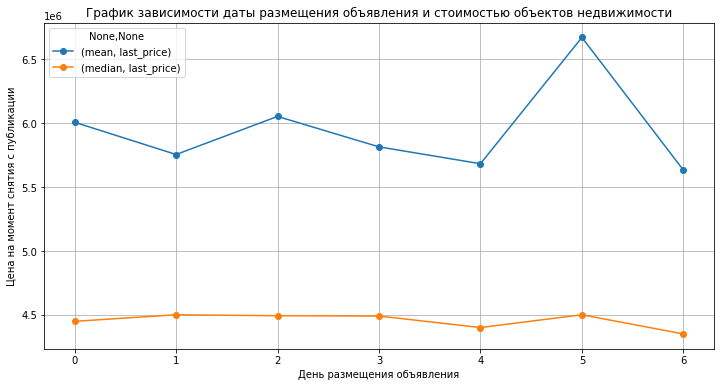

Процент корреляции столбца last_price к day_week_publication: 0%


In [67]:
#напишем функцию для построенния графика
def date_plot_bar(col,date):
    (
        data_analysis
        .pivot_table(index=col , values= 'last_price', aggfunc=['mean', 'median'])
        .plot(
            style='o-',
            grid=True, 
            figsize=(12, 6))
    );
    plt.xlabel(f'{date} размещения объявления')
    plt.ylabel('Цена на момент снятия с публикации')
    plt.title('График зависимости даты размещения объявления и стоимостью объектов недвижимости')
    plt.show()
    
#построим график зависимости дня на стоимость
date_plot_bar('day_week_publication','День')
#определим процент корреляции last_price к day_week_publication
percent_corr_last_price('day_week_publication')

Изучив диаграмму, можно сделать вывод, что нет явной **корреляции между днем недели размещения объявления и ценой недвижимости (0%)**. Стоимость объектов недвижимости остается относительно постоянной в течение недели, что указывает на то, что день недели не оказывает существенного влияния на цену недвижимости.

**Зависимость от месяца размещения объявления и стоимостью объектов недвижимости**

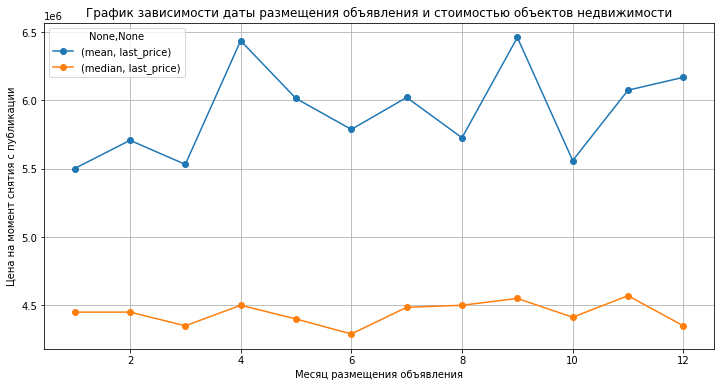

Процент корреляции столбца last_price к month_publication: 1%


In [68]:
#построим график зависимости месяца на стоимость
date_plot_bar('month_publication','Месяц')
#определим процент корреляции last_price к month_publication
percent_corr_last_price('month_publication')

Изучив диаграмму, можно сделать вывод, что нет явной **корреляции между месяцем размещения объявления и ценой недвижимости (1%)**. Стоимость объектов недвижимости остается относительно постоянной в месяца, что указывает на то, что день недели не оказывает существенного влияния на цену недвижимости.

**Зависимость от года размещения объявления и стоимостью объектов недвижимости**

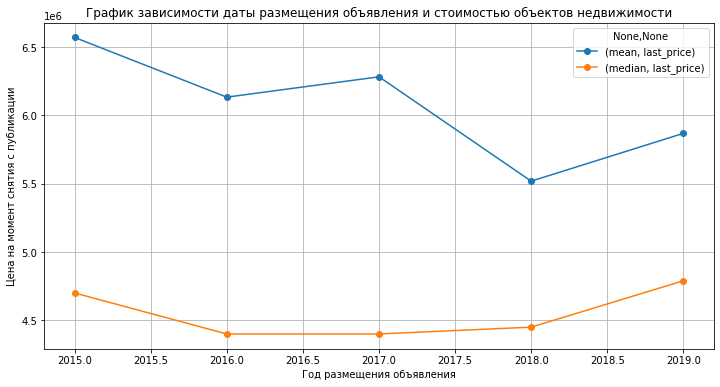

Процент корреляции столбца last_price к year_publication: -3%


In [69]:
#построим график зависимости года на стоимость
date_plot_bar('year_publication','Год')
#определим процент корреляции last_price к year_publication
percent_corr_last_price('year_publication')

Изучив график, можно сделать вывод, что на первый взгляд не наблюдается **корреляционной зависимости между годом публикации объявления и стоимостью объектов недвижимости (-3%)**. Однако, если исключить объявления, размещенные до 2016 года, то становится очевидным четкий тренд, свидетельствующий о постепенном росте стоимости объектов недвижимости с течением лет. Это значит, что с каждым годом стоимость объектов недвижимости имеет тенденцию увеличиваться, что может быть обусловлено различными факторами, такими как изменение спроса и предложения на рынке недвижимости, рост экономики и т.д.

**Вывод анализ факторов влияющих на стоимость объектов недвижимости**

Проанализировав представленные диаграммы, можно сделать вывод, что корреляция между характеристиками недвижимости и ее стоимостью имеет умеренный и слабый характер, за исключением некоторых факторов. Общая площадь объектов недвижимости имеет наибольшую корреляцию со стоимостью (61%), при этом коэффициент корреляции 65% указывает на умеренную положительную связь. Жилая и кухонная площади также положительно коррелируют со стоимостью, но в меньшей степени — 52% и 51% соответственно. 

Количество комнат и стоимость недвижимости демонстрируют низкую корреляцию (34%), что может быть обусловлено влиянием других факторов, таких как общая площадь. Расположение по этажам имеет некоторое влияние на цену, где объекты на верхних этажах обычно стоят дороже. 

Относительно дней недели и месяцев размещения объявлений, корреляция с ценой недвижимости практически отсутствует, указывая на стабильность цен независимо от этих временных параметров. 

Год публикации объявления в общем не коррелирует с ценой, но более детальный анализ выявляет тенденцию к росту стоимости недвижимости начиная с 2016 года, что может быть связано с макроэкономическими изменениями и динамикой рынка. 

Таким образом, хотя некоторые характеристики, особенно общая площадь, демонстрируют умеренную корреляцию с ценой, другие факторы, такие как расположение и рыночные условия, играют не менее важную роль в определении стоимости объектов недвижимости.

### **Топ-10 населённых пунктов**

,locality_name,number_of_ads,median_price_sqm
0,Санкт-Петербург,10720,102727.0
1,поселок Мурино,463,86043.0
2,Кудрово,350,95791.0
3,поселок Шушары,344,76220.0
4,Колпино,262,73305.0
5,Всеволожск,261,65789.0
6,поселок Парголово,247,91040.0
7,Пушкин,238,97479.0
8,Гатчина,211,67696.0
9,Выборг,169,57432.0


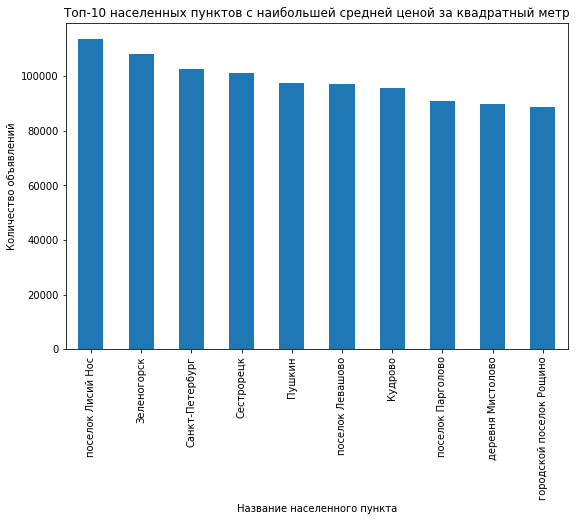

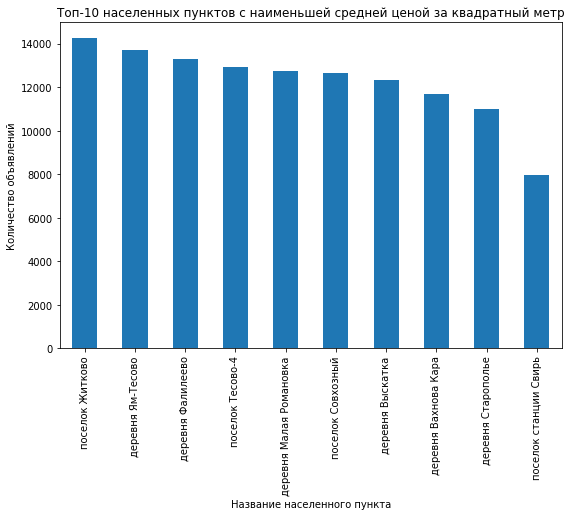

Населенный пункт с наибольшей средней ценой за квадратный метр: поселок Лисий Нос
Населенный пункт с наименьшей средней ценой за квадратный метр: поселок станции Свирь


In [70]:
#создадим сводную таблицу и премним к ней сортировку, сброс индекса, переименование столбцов
top_10_data_analysis = data_analysis\
.pivot_table(
    index='locality_name', values=['days_exposition','price_sqm'], 
    aggfunc={'days_exposition':'count','price_sqm': lambda x: round(x.median(), 0)})\
.sort_values(by='days_exposition', ascending=False)\
.reset_index()\
.rename(columns={'days_exposition': 'number_of_ads','price_sqm':'median_price_sqm'})
#выведим первые 10 строк сводной таблицы
display(top_10_data_analysis.head(10))

(
top_10_data_analysis
    .pivot_table(index='locality_name', values='median_price_sqm')
    .sort_values(by='median_price_sqm', ascending=False)
    .head(10)
    .plot(
        kind='bar',
        legend=False,
        figsize=(9,6))
);

plt.xlabel('Название населенного пункта')
plt.ylabel('Количество объявлений')
plt.title('Топ-10 населенных пунктов с наибольшей средней ценой за квадратный метр')
plt.show()

(
top_10_data_analysis
    .pivot_table(index='locality_name', values='median_price_sqm')
    .sort_values(by='median_price_sqm', ascending=False)
    .tail(10)
    .plot(
        kind='bar',
        legend=False,
        figsize=(9,6))
);

plt.xlabel('Название населенного пункта')
plt.ylabel('Количество объявлений')
plt.title('Топ-10 населенных пунктов с наименьшей средней ценой за квадратный метр')
plt.show()

print(f"Населенный пункт с наибольшей средней ценой за квадратный метр: {top_10_data_analysis.loc[top_10_data_analysis['median_price_sqm'].idxmax(), 'locality_name']}")
print(f"Населенный пункт с наименьшей средней ценой за квадратный метр: {top_10_data_analysis.loc[top_10_data_analysis['median_price_sqm'].idxmin(), 'locality_name']}")

**Вывод Топ-10 населённых пунктов**

Изучив сводную таблицу, которую мы составили, содержащей информацию о населенных пунктах, количестве объявлений о недвижимости и средней стоимости одного квадратного метра, мы выявили следующие ключевые моменты:

**Топ-10 населенных пунктов по количеству объявлений:** Нашли города, которые демонстрируют наибольшую активность на рынке недвижимости. Это свидетельствует о высоком спросе и предложении в данных регионах, что может быть интересно как для покупателей, так и для продавцов недвижимости.

**Населенный пункт с самой высокой средней ценой за квадратный метр: Зеленогорс** занимает первое место по этому показателю. Это может указывать на привлекательность города для жизни, высокое качество жилых объектов или наличие уникальных предложений на рынке.

**Населенный пункт с самой низкой средней ценой за квадратный метр: Поселок станции Свирь** отмечен как регион с наиболее доступными ценами на недвижимость. Это может быть интересным вариантом для тех, кто ищет более экономичные варианты жилья, не теряя при этом доступности к городским удобствам или природным красотам.

### **Анализ зависимости средней стоимость объектов от расстояния до центра города**

count    12458.000000
mean        14.502167
std          8.377370
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         65.000000
Name: city_centers_nearest_km, dtype: float64


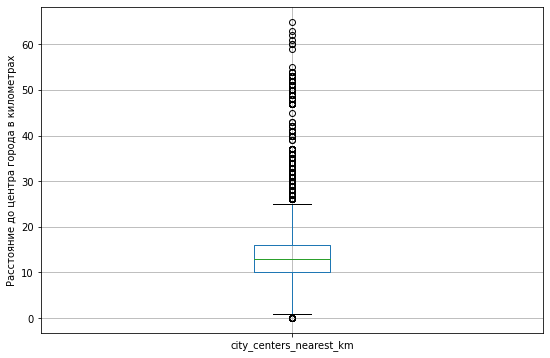

In [71]:
#обзор свойтсв столбца
print (data_analysis['city_centers_nearest_km'].describe())
#построим график ящик с усами
data_analysis.plot(
    y='city_centers_nearest_km',
    kind = 'box',
    ylabel = 'Расстояние до центра города в километрах', 
    figsize=(9,6),
    grid=True
);

Для более глубокого понимания распределения значений в столбце `city_centers_nearest_km`, который представляет собой расстояние от объектов недвижимости до центра города в километрах, мы построили наглядный график "ящик с усами" (блокплот). Этот график позволяет нам визуально оценить ключевые характеристики данных, такие как медиана, квартили и выбросы. Мы можем сфокусироваться на наиболее репрезентативных значениях, которые отражают основные тенденции рынка, и проведем необходимое преобразование данных.

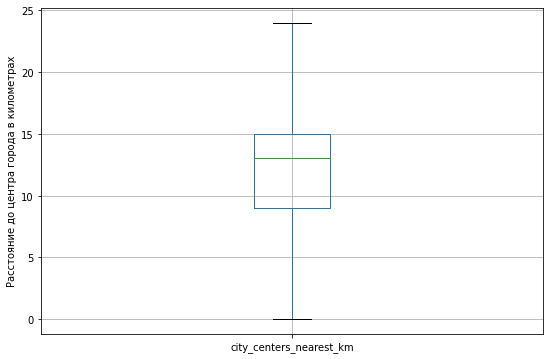

In [72]:
#отфильтурем датафрейм
data_analysis = data_analysis.query('city_centers_nearest_km <= 24')
#построим график ящик с усами
data_analysis.plot(
    y='city_centers_nearest_km',
    kind = 'box',
    ylabel = 'Расстояние до центра города в километрах', 
    figsize=(9,6),
    grid=True
);


Убедившись в правильности выбранного диапазона данных, мы готовы перейти к следующему шагу нашего анализа - построению диаграммы.

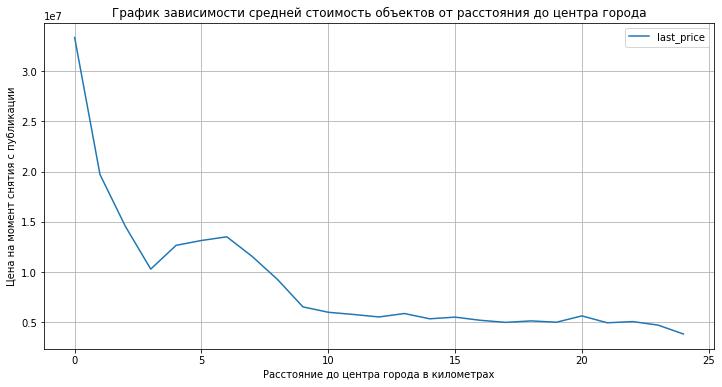

In [73]:
(
    data_analysis
    .query("locality_name == 'Санкт-Петербург'")
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(
          grid=True, 
          figsize=(12, 6),
          alpha =1)
);

plt.xlabel('Расстояние до центра города в километрах')
plt.ylabel('Цена на момент снятия с публикации')
plt.title('График зависимости средней стоимость объектов от расстояния до центра города')
plt.show()

**Вывод анализ зависимости средней стоимость объектов от расстояния до центра города**

Изучив построенную диаграмму, можно сделать вывод, что **существует зависимость между расстоянием объекта недвижимости от центра города и его стоимостью квадратного метра**. Чем больше расстояние до центра города, тем ниже стоимость объекта недвижимости. Также на диаграмме можно заметить , что после 6 километров от центра города цена квадратного метра начинает стремительно падать, что может свидетельствовать о том, что в этом районе заканчиваются центральные районы города, характеризующиеся высокой стоимостью недвижимости. 

### **Вывод**

Обобщая исследовательский анализ рынка недвижимости, мы можем констатировать преобладание спроса на компактные и функциональные объекты, особенно однокомнатные и двухкомнатные квартиры, в ценовом диапазоне от 3,5 до 4,5 миллионов рублей. Жители предпочитают жилье с высотой потолков 2,65 метра на средних этажах пяти- и девятиэтажных домов, расположенное в спальных районах с доступом к паркам, на расстоянии примерно 12-17 км от городского центра. Общая площадь является ключевым фактором, влияющим на стоимость недвижимости, при этом есть умеренные корреляции с жилой и кухонной площадью. Длительность продажи обычно не превышает 90 дней, а цены не сильно зависят от времени года или дня недели объявления. Географические и временные факторы, вкупе с качеством объектов, формируют сложную картину рынка, где некоторые города и районы выделяются по активности и ценовой доступности. Расстояние до центра оказывает значительное влияние на стоимость квадратного метра, с падением стоимости за пределами 6 км. Этот анализ дает представление о текущих тенденциях и помогает в принятии решений на рынке недвижимости.

## Общий вывод

В рамках проведённой работы была успешно выполнена комплексная очистка и предварительная обработка данных по недвижимости, обеспечивая высококачественную основу для последующего анализа и моделирования. Были исправлены ошибки ввода, пропущенные значения были обработаны с использованием обоснованных методов заполнения, а имена столбцов и типы данных были стандартизированы и оптимизированы. В результате, данные стали более надёжными, последовательными и пригодными для анализа.

Дополнительно, были созданы новые информативные столбцы, такие как цена за квадратный метр, день и месяц публикации, год публикации, тип этажа и расстояние до центра города, что существенно обогатило набор данных и расширило возможности для детального исследования рынка недвижимости.

Анализ рынка выявил предпочтения потребителей в сторону компактных квартир с определёнными характеристиками, таких как высота потолков, расположение и доступность инфраструктуры. Выявлены также закономерности в ценовых диапазонах, зависимости стоимости от площади и расположения, а также временные характеристики продаж. Отмечено значительное влияние расстояния до центра города на стоимость недвижимости.

В целом, проведённые мероприятия по очистке и обогащению данных, а также результаты исследовательского анализа, представляют собой прочную основу для принятия обоснованных решений и стратегического планирования на рынке недвижимости.